In [1]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

from VectorAlgebra import *
from Bio.PDB.PDBParser import PDBParser

In [3]:
def checkIfNative(xyz_CAi, xyz_CAj):
    v = vector(xyz_CAi, xyz_CAj)
    r = vabs(v)
    if r<4.5: return True
    else: return False

In [4]:
p = PDBParser(PERMISSIVE=1)
s = p.get_structure("0", "rrms-b.pdb")

N = len(s[0].get_list()[0])
M = len(s[0].get_list()[1])
sigma = np.zeros((M,N))
print(np.shape(sigma))

(5, 200)


In [7]:
import itertools
for k in range(len(s)): 
        chains = s[k].get_list()
        i1=0
        for res1 in chains[1]:
            atoms_pdb1=[]
            for atom in res1:
                atoms_pdb1.append(atom.get_coord())
            i2=0
            for res2 in chains[0]:
                atoms_pdb2=[]
                for atom in res2:
                    atoms_pdb2.append(atom.get_coord())
                for a1, a2 in itertools.product(atoms_pdb1, atoms_pdb2):
                    if checkIfNative(a1, a2):
                        sigma[i1][i2] += 1
                i2 += 1
            i1 += 1

sigma = sigma/len(s)

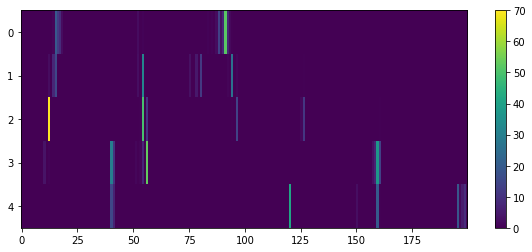

In [60]:
plt.figure(figsize=(10,4))
plt.imshow(sigma, aspect='auto')
plt.colorbar()
plt.savefig("aaweight.png")

(array([947.,   8.,   3.,   7.,   2.,   1.,   1.,   1.,   0.,   2.,   4.,
          0.,   2.,   0.,   0.,   2.,   2.,   1.,   0.,   3.,   0.,   2.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. , 14.7,
        15.4, 16.1, 16.8, 17.5, 18.2, 18.9, 19.6, 20.3, 21. , 21.7, 22.4,
        23.1, 23.8, 24.5, 25.2, 25.9, 26.6, 27.3, 28. , 28.7, 29.4, 30.1,
        30.8, 31.5, 32

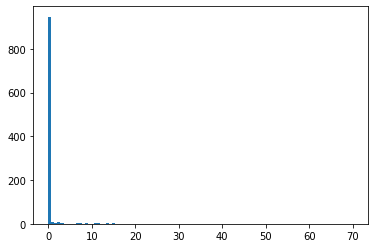

In [25]:
plt.hist(sigma.reshape(N*M), bins=100)

In [27]:
print(np.shape(sigma))
np.savetxt("aaweight.dat", sigma, fmt='%.3f')

(5, 200)


In [29]:
print(sigma[2][12])
print(np.sum(sigma))

70.0
694.1500000000001


In [62]:
all = np.sort(sigma.reshape(N*M))[977:]
tmp=0
for i in range(len(all)):
    tmp += np.log(all[i])

print(tmp)

70.01768483719852


In [55]:
print(sigma[0][52])

2.35


In [2]:
test=np.loadtxt("contact_protein_dna_ln_aaweight_cnct8.dat")
print(test)

[[ 16.      1.      7.391   2.97 ]
 [ 17.      1.     10.31    2.51 ]
 [ 18.      1.      8.419   2.158]
 [ 89.      1.      6.274   2.599]
 [ 92.      1.      4.502   3.951]
 [ 16.      2.      5.994   2.718]
 [ 55.      2.      9.892   3.463]
 [ 81.      2.      8.416   2.447]
 [ 95.      2.      4.948   3.264]
 [ 13.      3.      4.552   4.248]
 [ 55.      3.      7.392   3.906]
 [ 57.      3.      8.9     2.38 ]
 [ 97.      3.      5.9     2.632]
 [127.      3.      7.392   2.438]
 [ 41.      4.      6.257   3.409]
 [ 42.      4.     10.273   2.366]
 [ 57.      4.      5.394   3.976]
 [160.      4.      4.954   3.623]
 [161.      4.      4.492   2.614]
 [ 41.      5.      8.219   2.698]
 [121.      5.      5.086   3.721]
 [160.      5.      7.912   2.988]
 [196.      5.      6.443   2.929]
 [199.      5.      6.882   2.169]]


In [3]:
sum(test[:,3])

72.17699999999999

In [4]:
test[:,2]*test[:,3]

array([21.95127 , 25.8781  , 18.168202, 16.306126, 17.787402, 16.291692,
       34.255996, 20.593952, 16.150272, 19.336896, 28.873152, 21.182   ,
       15.5288  , 18.021696, 21.330113, 24.305918, 21.446544, 17.948342,
       11.742088, 22.174862, 18.925006, 23.641056, 18.871547, 14.927058])

In [10]:
tmp=0
for i in range(len(test)):
    tmp += exp(-((test[i][2]-15)**2)/10)*test[i][3]
print(tmp)

0.9901560398729242


In [11]:
tmp=0
for i in range(len(test)):
    tmp += exp(-((test[i][2]-12)**2)/10)*test[i][3]
print(tmp)

11.193489489678143


In [13]:
tmp=0
for i in range(len(test)):
    tmp += exp(-((test[i][2]-11)**2)/10)*test[i][3]
print(tmp)

18.968954609079795


In [14]:
tmp=0
for i in range(len(test)):
    tmp += exp(-((test[i][2]-10)**2)/10)*test[i][3]
print(tmp)

28.655909230707472
